In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from matplotlib import style 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

In [2]:
datos = pd.read_csv(filepath_or_buffer = "C:/Users/espin/Downloads/beisbol.csv", sep=',', low_memory=False)

In [3]:
datos

,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762
5,5,New_S.,5600,718
6,6,New_Y.,5518,867
7,7,Milwaukee,5447,721
8,8,Colorado,5544,735
9,9,Houston,5598,615


In [4]:
datos.describe()

,Unnamed: 0,bateos,runs
count,30.000000,30.000000,30.000000
mean,14.500000,5523.500000,693.600000
std,8.803408,79.873067,82.479088
min,0.000000,5417.000000,556.000000
25%,7.250000,5448.250000,629.000000
50%,14.500000,5515.500000,705.500000
75%,21.750000,5575.000000,734.000000
max,29.000000,5710.000000,875.000000


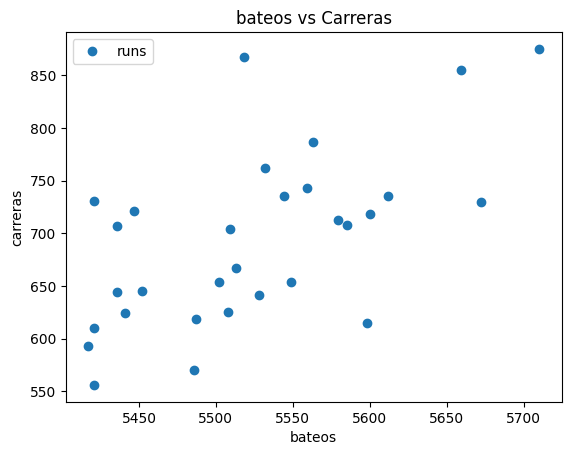

In [6]:
datos.plot(x='bateos', y='runs', style='o') 
plt.title('bateos vs Carreras') 
plt.xlabel('bateos') 
plt.ylabel('carreras') 
plt.show()

In [9]:
X = datos['bateos'].values.reshape(-1,1)
y = datos['runs'].values.reshape(-1,1)

In [10]:
#Definición de datos de prueba y datos de entrenamiento, "x" es la entrada y la "y" es la salida
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
regressor = LinearRegression()  #Se estancia el modelo de regresión lineal en un objeto llamado regressor
regressor.fit(X_train, y_train) #Entrena el algoritmo con la funcion .fit

LinearRegression()

In [12]:
#Para obtener el intercepto:, se multiplica por los valores del vector x mas el valor de alpha
print(regressor.intercept_)
#Para obtener la pendiente
print(regressor.coef_)

[-2837.77687486]
[[0.63897479]]


In [32]:
y_pred = regressor.predict(X_test) #Calculo de valores predichos

In [34]:
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
datos2

,Actual,Predicted
0,787,716.839887
1,593,623.549568
2,735,748.149652
3,708,730.897333
4,624,638.884963
5,707,635.690089


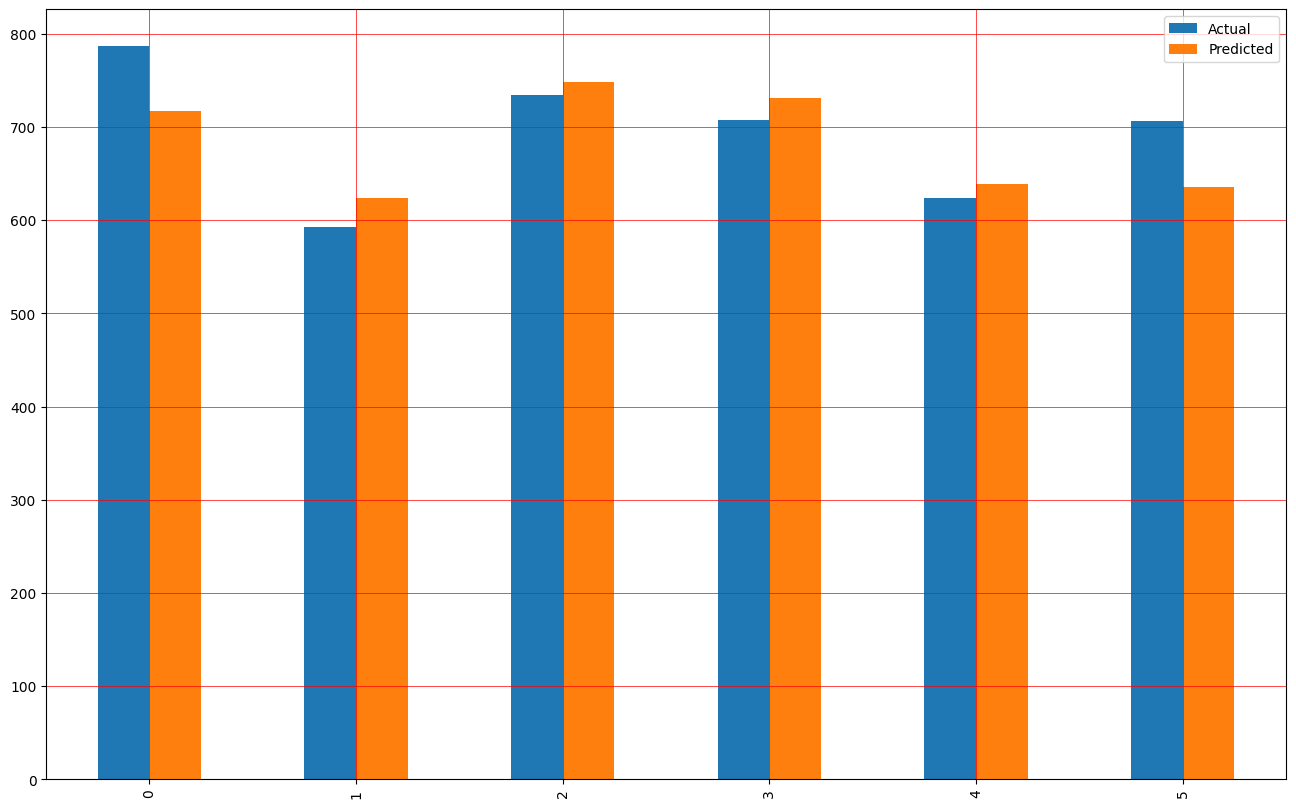

In [36]:
datos3 = datos2.head(25)
datos3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

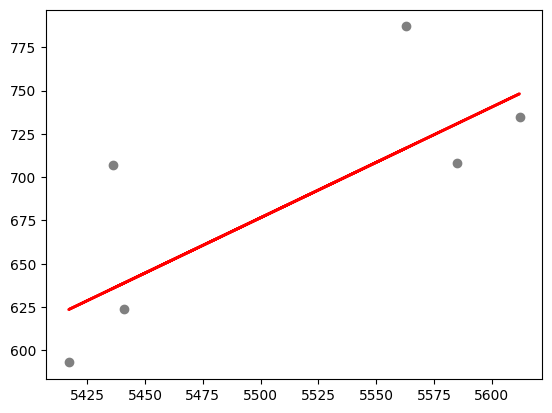

In [38]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [39]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 

Error Absoluto Medio: 37.158589869587935


In [40]:
print('Error Cuadratico Medio:', metrics.mean_squared_error(y_test, y_pred))

Error Cuadratico Medio: 1976.597374864583


In [41]:
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Raíz del error cuadrático medio: 44.4589403254799


In [42]:
#Coeficiente de determinación r2
r2= regressor.score(X_test, y_test)

In [43]:
#Error cuadratico relativo, es una metrica para la presición de su modelo
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.5399576825420558


In [45]:
#definir la evaluación
cv = RepeatedKFold(n_splits=8, n_repeats=3, random_state=1)

In [46]:
#definiendo el espacio de busqueda
space = dict()
space['copy_X'] = [True, False]
space['positive'] = [True, False]
space['fit_intercept'] = [True, False]
#space['normalize'] = [True, False]

In [50]:

search = RandomizedSearchCV(regressor, space, n_iter=8, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

In [51]:
#Ejecutando la busqueda
# "X" son los predictores y "y" es el valor predicho
result = search.fit(X,y)

In [52]:
#Resumen de resultados
print('Mejor puntuación: %s' % result.best_score_)
print('Mejores Hiperparametros: %s' % result.best_params_)

Mejor puntuación: -54.317841063478426
Mejores Hiperparametros: {'positive': False, 'fit_intercept': True, 'copy_X': True}


In [53]:
#Función que optimiza el modelo con los mejores hiperparametros
regressor = LinearRegression(fit_intercept = True, positive = False, copy_X = True)

In [54]:
#Re-entrenando el modelo 
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 

Error Absoluto Medio: 37.158589869587935


In [31]:
#Coeficiente de determinación r2
r2= regressor.score(X_test, y_test)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.5399576825420558


In [105]:
print("Coeficiente dedeterminación R^ 2: ", regressor.score(X,y))

Coeficiente dedeterminación R al cuadro:  0.7715544932781936
